In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='concordancia', ylabel='Pedidos'>

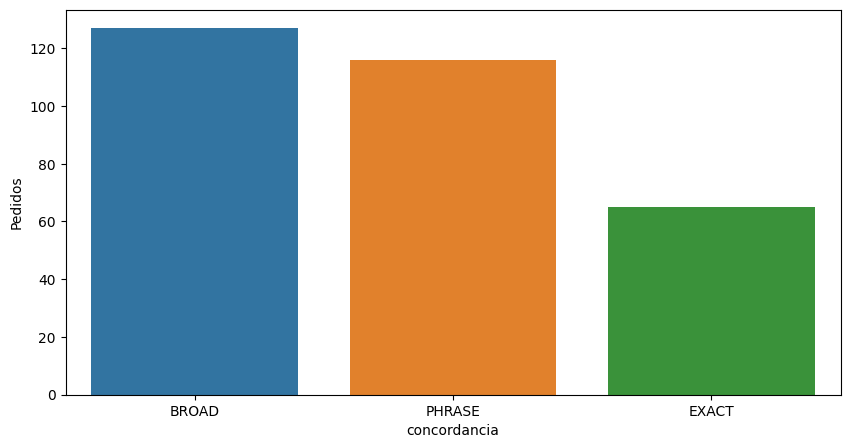

In [143]:
#¿Qué resultados ofrece cada tipo?

plt.figure(figsize=(10,5))
sns.barplot(x="concordancia", y="Pedidos", data=datos_con_ventas, estimator=sum,  errorbar=None)



<AxesSubplot:xlabel='Clics', ylabel='Pedidos'>

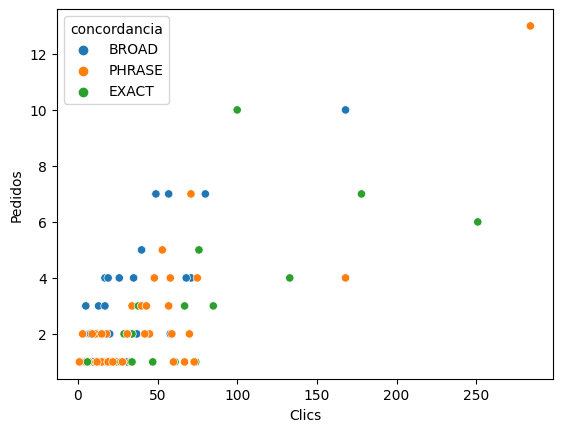

In [144]:
#Relación de Clicks e Impresiones según concordancia


sns.scatterplot(x="Clics", y="Pedidos", hue="concordancia", data=datos_con_ventas)


Text(0, 0.5, 'gasto')

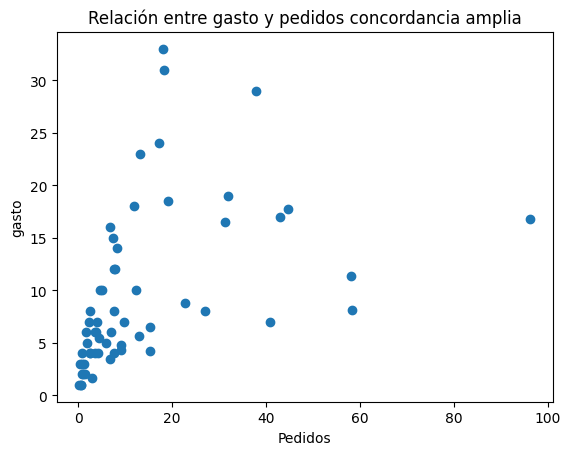

In [146]:
#RENTABILIDAD SEGÚN CONCORDANCIA 


plt.scatter(datos_vtas_amplia["gasto"], datos_vtas_amplia["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia amplia")
plt.xlabel("Pedidos")
plt.ylabel("gasto")


Text(0, 0.5, 'gasto')

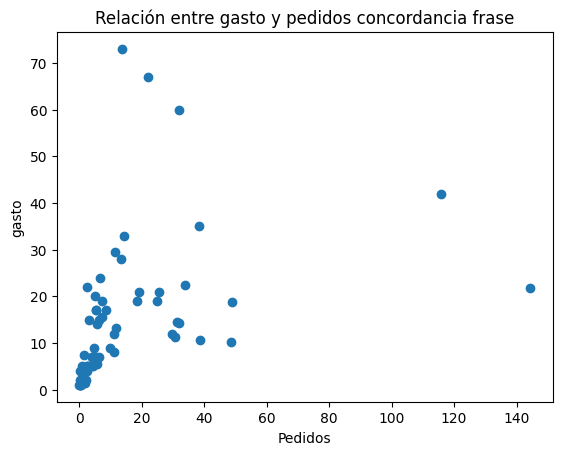

In [147]:
#RENTABILIDAD SEGÚN CONCORDANCIA FRASE


plt.scatter(datos_vtas_frase["gasto"], datos_vtas_frase["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia frase")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

Text(0, 0.5, 'gasto')

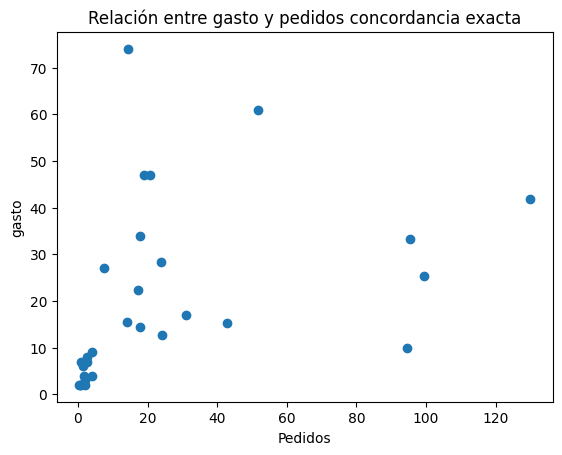

In [148]:
#RENTABILIDAD SEGÚN CONCORDANCIA EXACTA


plt.scatter(datos_vtas_exacta["gasto"], datos_vtas_exacta["clicks para vta"])

# Agregar título y etiquetas de los ejes
plt.title("Relación entre gasto y pedidos concordancia exacta")
plt.xlabel("Pedidos")
plt.ylabel("gasto")

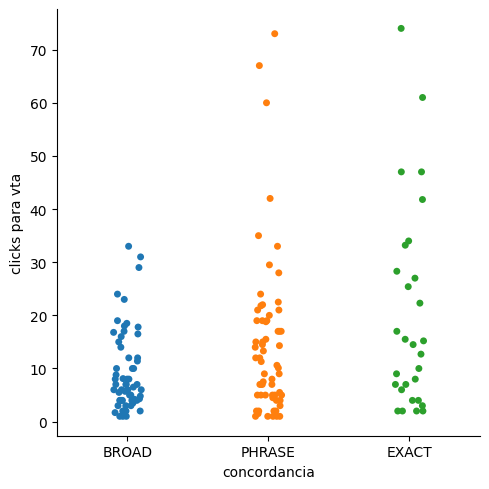

In [149]:
#clics para obtener una venta según concordancia
sns.catplot(x="concordancia", y="clicks para vta", hue="concordancia", data=datos_con_ventas);

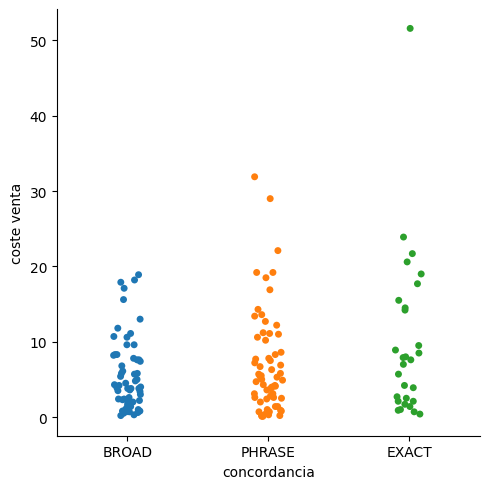

In [150]:
sns.catplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas);

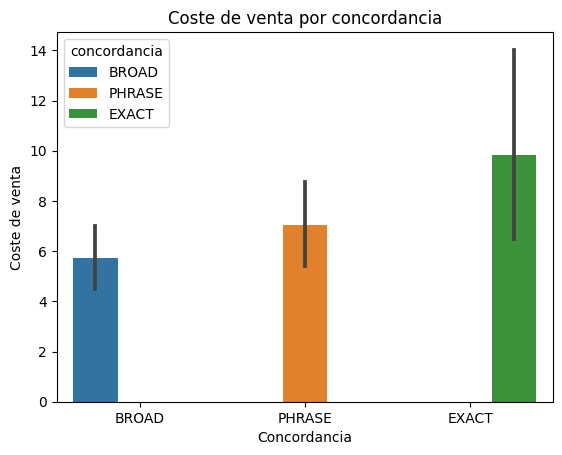

In [151]:


sns.barplot(x="concordancia", y="coste venta", hue="concordancia", data=datos_con_ventas)

plt.title("Coste de venta por concordancia")
plt.xlabel("Concordancia")
plt.ylabel("Coste de venta")

plt.show()


In [153]:
frase_test = datos_con_ventas.loc[datos_con_ventas.concordancia == "PHRASE", "Pedidos"]
broad_test = datos_con_ventas.loc[datos_con_ventas.concordancia == "EXACT", "Pedidos"]

In [154]:
alpha = 0.05 

In [155]:
# Calculo del estadístico y p-valor
stat, p = ttest_ind(frase_test, broad_test)
print(stat,p)

-0.901934570083097 0.3694990789526219


In [156]:
# Decisión en función del p-valor y el nivel de significación

if p < alpha:
    print("Rechazar la hipótesis nula:  (p-value: {:.4f})".format(p))
else:
    print("No se puede rechazar la hipótesis nula:  (p-value: {:.4f})".format(p))

No se puede rechazar la hipótesis nula:  (p-value: 0.3695)


In [158]:
- H0: no hay diferencia significativa entre los pedidos de Broad y frase

- H1: hay diferencia significativa entre entre los pedidos de Broad y frase

SyntaxError: invalid syntax (3329904025.py, line 1)

In [ ]:


frase_test_2 = datos_con_ventas[datos_con_ventas["concordancia"]=="PHRASE"]["Pedidos"]
broad_test_2 = datos_con_ventas[datos_con_ventas["concordancia"]=="BROAD"]["Pedidos"]

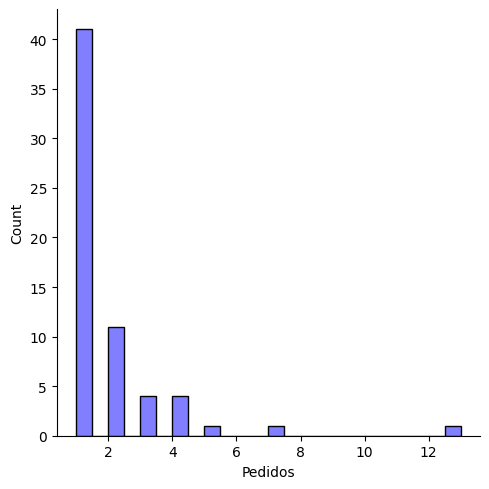

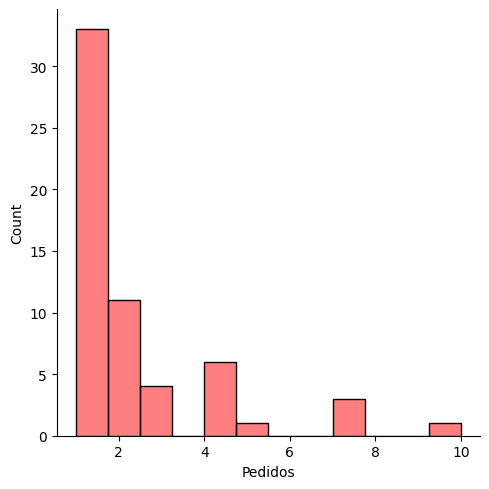

In [ ]:
sns.displot(frase_test_2, color='blue', alpha=0.5)
sns.displot(broad_test_2, color='red', alpha=0.5)

In [ ]:
from scipy.stats import mannwhitneyu

U, p_valor = mannwhitneyu(frase_test_2, broad_test_2)

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

Estadístico U:  853.5
P-valor:  0.558973332075086


In [ ]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))

No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: 0.5590)


In [ ]:
#kw mas ineficientes

datos_sin_ventas = datos_raw[datos_raw["Pedidos"] == 0]
datos_ordenados = datos_sin_ventas.sort_values(by="gasto", ascending=False)
datos_ordenados

,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta
484,BROAD,libros fantasia,EXACT,4423,32,34.61,1.08,0,inf,inf
529,BROAD,libros de fantasía,BROAD,4071,33,29.08,0.88,0,inf,inf
717,BROAD,libros 14 años,BROAD,999,35,22.05,0.63,0,inf,inf
855,BROAD,libro 18 años,BROAD,2083,38,20.82,0.55,0,inf,inf
2419,Kindle,libros para kindle,BROAD,15613,61,20.43,0.33,0,inf,inf
...,...,...,...,...,...,...,...,...,...,...
1303,FRASE,libros brandon sanderson,PHRASE,0,0,0.00,0.00,0,NaN,NaN
1304,FRASE,libros baratos 12 años,PHRASE,0,0,0.00,0.00,0,NaN,NaN
1305,FRASE,libros aventuras niños 12 años,PHRASE,0,0,0.00,0.00,0,NaN,NaN
1306,FRASE,libros aventuras niños 10 años,PHRASE,0,0,0.00,0.00,0,NaN,NaN


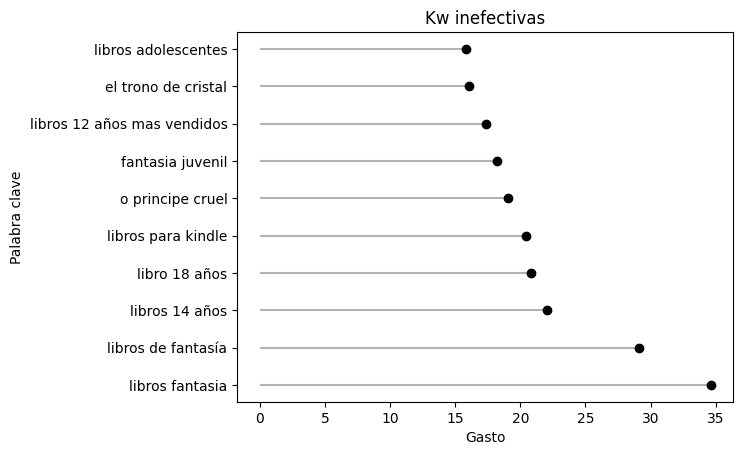

In [ ]:
import matplotlib.pyplot as plt

datos_ordenados = datos_sin_ventas.sort_values(by="gasto", ascending=False)

datos_top10 = datos_ordenados.head(10)

plt.hlines(y=datos_top10["Palabra clave"], xmin=0, xmax=datos_top10["gasto"], color='gray', alpha=0.6)
plt.plot(datos_top10["gasto"], datos_top10["Palabra clave"], "o", color='black')

plt.title("Kw inefectivas")
plt.xlabel("Gasto")
plt.ylabel("Palabra clave")

plt.show()

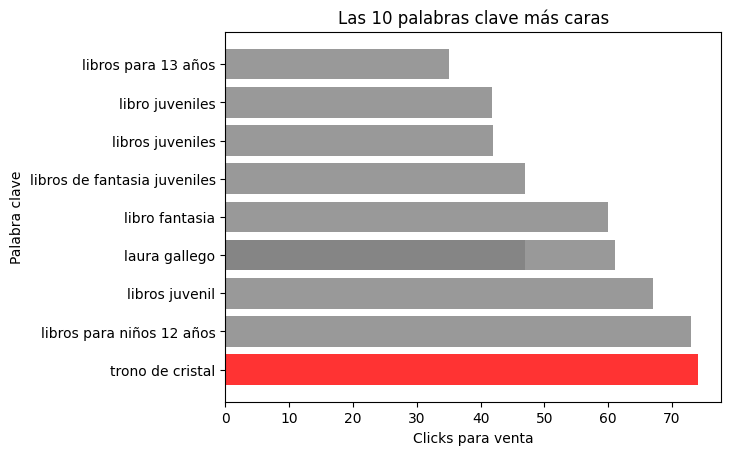

In [ ]:
#kw cuyo gasto para conseguir una venta sea demasiado elevado   

datos_ordenados = datos_con_ventas.sort_values(by="clicks para vta", ascending=False)

datos_top10 = datos_ordenados.head(10)

plt.barh(datos_top10["Palabra clave"], datos_top10["clicks para vta"], color=colores, alpha=0.8)


plt.title("Las 10 palabras clave más caras")
plt.xlabel("Clicks para venta")
plt.ylabel("Palabra clave")


plt.show()



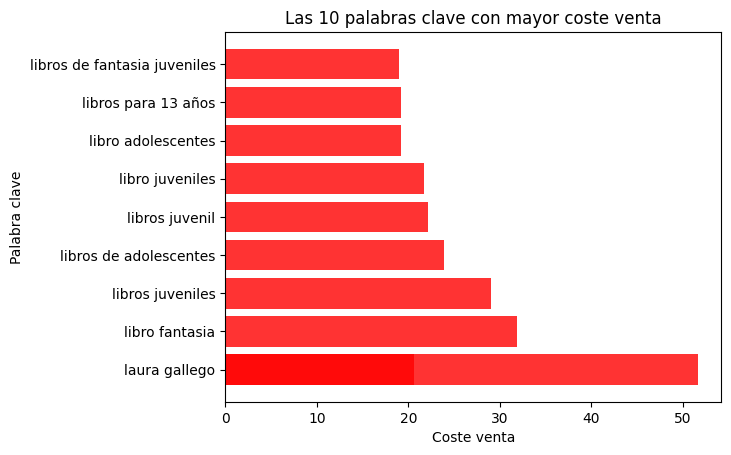

In [ ]:
import matplotlib.pyplot as plt


ventas_coste_alto = datos_con_ventas.sort_values(by="coste venta", ascending=False)


ventas_coste_alto_top10 = ventas_coste_alto.head(10)


plt.barh(ventas_coste_alto_top10["Palabra clave"], ventas_coste_alto_top10["coste venta"], color="red", alpha=0.8)

plt.title("Las 10 palabras clave con mayor coste venta")
plt.xlabel("Coste venta")
plt.ylabel("Palabra clave")


plt.show()


In [ ]:
#correlacion gasto con pedidos
feature_name = 'gasto'
target_column = 'Pedidos'

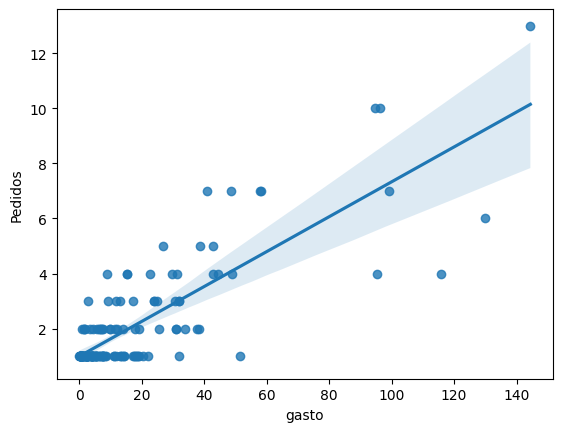

In [ ]:
_= sns.regplot(data = datos_con_ventas , x = feature_name,  y = target_column)

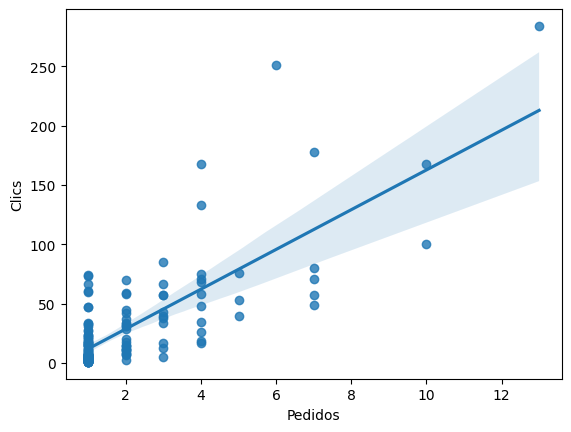

In [ ]:
_= sns.regplot(data = datos_con_ventas , x = target_column ,  y = feature_name)

In [ ]:
#correlacion clics con pedidos
feature_name = 'Clics'
target_column = 'Pedidos'

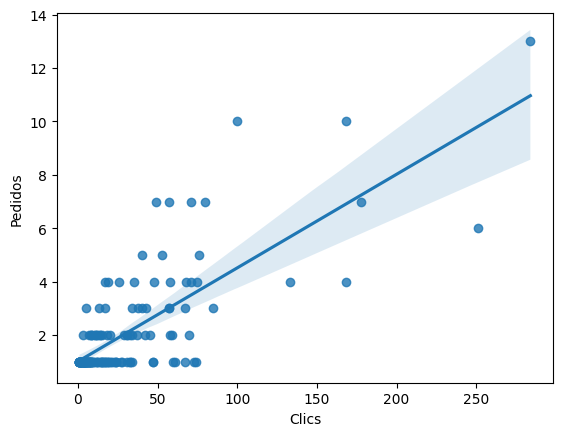

In [ ]:
_= sns.regplot(data = datos_con_ventas , x = feature_name,  y = target_column)

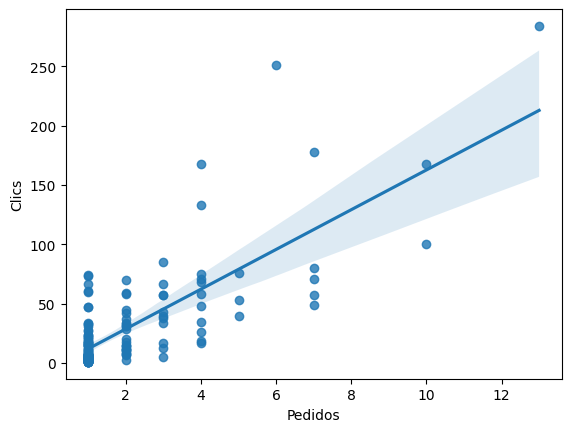

In [ ]:
_= sns.regplot(data = datos_con_ventas , x =target_column ,  y = feature_name)

In [ ]:
#cuadrante media y comparar que tengan pedidos si 

In [ ]:
from scipy import stats
import statsmodels.api as sm

In [ ]:
from statsmodels.formula.api import ols

In [163]:
#Predecir pedidos según clics

formula = 'Pedidos ~ Clics'
lm = ols(formula, datos_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Pedidos   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     5664.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:09:14   Log-Likelihood:                -1341.2
No. Observations:                3430   AIC:                             2686.
Df Residuals:                    3428   BIC:                             2699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.006      0.835      0.4

In [164]:
#Predecir pedidos según gasto

formula = 'Pedidos ~ gasto'
lm = ols(formula, datos_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Pedidos   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     8251.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:10:08   Log-Likelihood:                -911.76
No. Observations:                3430   AIC:                             1828.
Df Residuals:                    3428   BIC:                             1840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0111      0.005      2.032      0.0

In [166]:
#regresion multiple

formula = 'Pedidos ~ gasto + Clics '
lm = ols(formula, datos_raw).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Pedidos   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     4137.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:11:01   Log-Likelihood:                -907.94
No. Observations:                3430   AIC:                             1822.
Df Residuals:                    3427   BIC:                             1840.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0126      0.005      2.295      0.0

In [ ]:
#KEYWORDS

In [ ]:
#Media CPC
datos_con_ventas[["CPC", "Clics", "coste venta", "Pedidos", "clicks para vta"]].mean()


CPC                 0.540728
Clics              29.450331
coste venta         7.060265
Pedidos             2.039735
clicks para vta    13.696689
dtype: float64

In [ ]:
datos_con_ventas["% imp clic"]=datos_con_ventas["Clics"]/datos_con_ventas["Impresiones"]

c:\Users\Abraham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
CPC                 0.540728
Clics              29.450331
coste venta         7.060265
Pedidos             2.039735
clicks para vta    13.696689
dtype: float64

In [ ]:
kw_exitosas.query('Pedidos > 2 and `coste venta` < 7.06 and `clicks para vta` < 13.69 and CPC < 0.55')


,Pedidos,CPC,clicks para vta,coste venta,Impresiones,Clics,% imp clic
Palabra clave,,,,,,,
la erupcion zafiro,3,0.080,5.00,0.45,154,16,0.241667
las puertas de piedra,3,0.180,12.25,2.75,19295,29,0.001495
libro 17 años,4,0.470,4.80,2.30,744,19,0.025538
libros 16 años,4,0.465,2.65,1.60,520,14,0.137597
libros de fantasia adultos,4,0.515,6.50,3.30,1187,26,0.022445
libros juveniles 12 años,6,0.490,12.00,5.90,5916,72,0.015603
libros kindle,4,0.540,11.50,5.45,12444,61,0.004213


In [ ]:
#sin agrupar por palabra clave y teniendo en cuenta concordancia
datos_con_ventas.query('Pedidos > 1 and `coste venta` < 8 and `clicks para vta` < 15 and CPC < 0.65')


,CAMPAIGN,Palabra clave,concordancia,Impresiones,Clics,gasto,CPC,Pedidos,clicks para vta,coste venta,ratio imp clic,% imp clic
263,BROAD,libros para adolescentes de 16 años,PHRASE,2859,58,31.16,0.54,4,14.5,7.8,49.293103,0.020287
353,BROAD,libros mas vendidos de 12 años,BROAD,473,11,4.42,0.40,2,5.5,2.2,43.000000,0.023256
423,BROAD,libros juveniles 13 años,BROAD,1128,20,12.25,0.61,2,10.0,6.1,56.400000,0.017730
427,BROAD,libros juveniles 12 años,PHRASE,3420,48,29.81,0.62,4,12.0,7.5,71.250000,0.014035
541,BROAD,libros de fantasia adultos,BROAD,666,12,6.94,0.58,2,6.0,3.5,55.500000,0.018018
802,BROAD,libro espada,BROAD,1113,5,2.84,0.57,3,1.7,0.9,222.600000,0.004492
857,BROAD,libro 17 años,BROAD,744,19,9.01,0.47,4,4.8,2.3,39.157895,0.025538
860,BROAD,libro 15 años mas vendido,BROAD,331,8,3.49,0.44,2,4.0,1.7,41.375000,0.024169
865,BROAD,libro 14 años mas vendido,BROAD,1031,26,15.21,0.59,4,6.5,3.8,39.653846,0.025218
893,BROAD,la erupcion zafiro,BROAD,144,12,1.56,0.13,2,6.0,0.8,12.000000,0.083333


In [ ]:
#Ordeno kw en funcion de mayor número de ventas

kw_exitosas=kw_exitosas.sort_values(by="coste venta", ascending=True)
kw_exitosas.head(25)

,Pedidos,CPC,clicks para vta,coste venta,Impresiones,Clics
Palabra clave,,,,,,
laura gallego finis mundi,1,0.230,1.00,0.20,131,1
libro fantasia 18 años,1,0.250,1.00,0.20,7,1
libro fantasia 12 años,1,0.250,1.00,0.20,11,1
libros de niños de 10 años,1,0.110,3.00,0.30,346,3
libros niños 10 años,1,0.140,2.00,0.30,184,2
la erupcion zafiro,3,0.080,5.00,0.45,154,16
libros de lectura para 12 años,1,0.510,1.00,0.50,51,1
libros para niños 18 años,1,0.610,1.00,0.60,9,1
libros 11 años niño,1,0.670,1.00,0.70,1,1


0.540728476821192